# <font color='red'>TP Apprentissage non supervisé - Partie 1</font>

### Cindy Ponidjem & Lucie Helcmanocki

## <font color='blue'>Sommaire</font>

### Première partie : DBSCAN
#### 1. Recherche intuitive
    1.1 Application
    1.2 Analyses des résultats obtenus par la recherche intuitive
#### 2. Automatisation de la recherche des paramètres
    2.1 Application
    2.2 Resultats
#### Conclusion sur DBSCAN

### Deuxième partie : SNN
#### 1. Implémentation de l'algorithme
    1.1 Algorithme 1
    1.2 Algorithme 2

#### Conclusion sur SNN



## <font color='blue'>Première partie : DBSCAN</font>

Dans cette première partie nous allons appliquer la méthodes DBSCAN de scikit-learn sur nos différents dataset.
On cherche à trouver les paramètres eps et min_samples optimaux.
On évaluera la qualité  du paramétrage de la méthode à partir de deux indicateurs: le coefficient de silhouette et le coefficient de Davies Bouldin (DB).


Davies Bouldin (DB) index : mesure d'homogénéité et de séparation afin de déterminer la qualité inter-cluster. Plus la valeur de DB est faible, plus les clusters sont homogènes et bien séparés. On cherche donc à minimiser l'index de DB.

Le coefficient de silhouette combine deux mesures :  
-la cohésion (proximité) : appartenance au "bon" cluster  
-la séparation : éloignement des autres clusters  
La meilleure valeur est 1, la pire est -1. Les valeurs proches de 0 indiquent des clusters qui se chevauchent.
On cherche à maximiser ce coefficient.

Import des bibliothèques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection as ms
from random import randint
import time

from sklearn.utils import check_X_y, check_random_state, safe_indexing, deprecated
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances
np.seterr(divide='ignore', invalid='ignore')
def check_number_of_labels(n_labels, n_samples):
    if not 1 < n_labels < n_samples:
        raise ValueError("Number of labels is %d. Valid values are 2 "
"to n_samples - 1 (inclusive)" % n_labels)

#from sklearn.metrics import davies_bouldin_score
def davies_bouldin_score(X, labels):
    X, labels = check_X_y(X, labels)
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    n_samples, _ = X.shape
    n_labels = len(le.classes_)
    check_number_of_labels(n_labels, n_samples)

    intra_dists = np.zeros(n_labels)
    centroids = np.zeros((n_labels, len(X[0])), dtype=np.float)
    for k in range(n_labels):
        cluster_k = safe_indexing(X, labels == k)
        centroid = cluster_k.mean(axis=0)
        centroids[k] = centroid
        intra_dists[k] = np.average(pairwise_distances(
            cluster_k, [centroid]))

    centroid_distances = pairwise_distances(centroids)

    if np.allclose(intra_dists, 0) or np.allclose(centroid_distances, 0):
        return 0.0

    score = (intra_dists[:, None] + intra_dists) / centroid_distances
    score[score == np.inf] = np.nan
    return np.mean(np.nanmax(score, axis=1))


## 1. Recherche intuitive 

### 1.1 Application

On essaie de trouver manuellement les paramètres optimaux pour chaque dataset en faisant varier eps et min_samples progressivement.

#### dataset t4.8k

Estimated number of clusters: 6
Estimated number of noise points: 756
Silhouette Coefficient: 0.234
David Bouldin Coefficient: 2.840


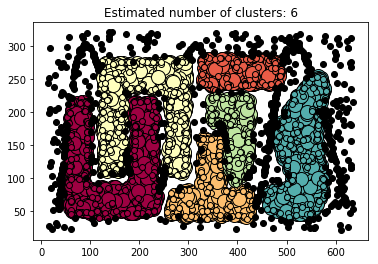

In [3]:
X= np.genfromtxt('./t4.8k.dat', dtype=None, delimiter=' ')

#Compute DBSCAN
db=DBSCAN(eps=8.2,min_samples=15).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# silhouette coefficient and david bouldin
sc48= metrics.silhouette_score(X, labels)
print("Silhouette Coefficient: %0.3f"
      % sc48)

print ("David Bouldin Coefficient: %0.3f"
      %davies_bouldin_score(X, labels))


#Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


#### dataset t5.8k

Estimated number of clusters: 6
Estimated number of noise points: 629
Silhouette Coefficient: 0.478
David Bouldin Coefficient: 2.140


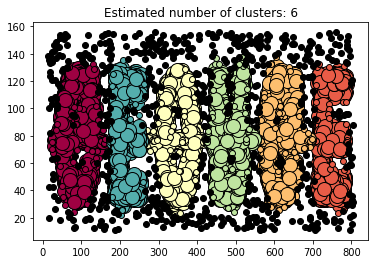

In [4]:
X= np.genfromtxt('./t5.8k.dat', dtype=None, delimiter=' ')

#Compute DBSCAN
db=DBSCAN(eps=8.2,min_samples=13).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# silhouette coefficient and david bouldin
sc58= metrics.silhouette_score(X, labels)
print("Silhouette Coefficient: %0.3f"
      % sc58)

print ("David Bouldin Coefficient: %0.3f"
      %davies_bouldin_score(X, labels))

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


#### dataset t7.10k

Estimated number of clusters: 9
Estimated number of noise points: 950
Silhouette Coefficient: -0.079
David Bouldin Coefficient: 2.094


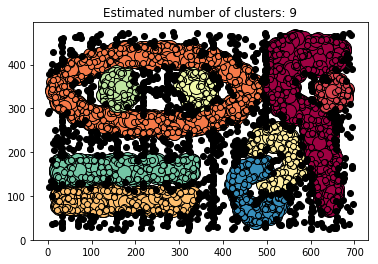

In [5]:
X= np.genfromtxt('./t7.10k.dat', dtype=None, delimiter=' ')

#Compute DBSCAN
#eps et min_samples=bore inférieur pour la taille des classes
db=DBSCAN(eps=8.5,min_samples=12).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


# silhouette coefficient and david bouldin
sc71= metrics.silhouette_score(X, labels)
print("Silhouette Coefficient: %0.3f"
      % sc71)

print ("David Bouldin Coefficient: %0.3f"
      %davies_bouldin_score(X, labels))

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


#### dataset t8.8k

Estimated number of clusters: 5
Estimated number of noise points: 215
Silhouette Coefficient: -0.007
David Bouldin Coefficient: 1.932


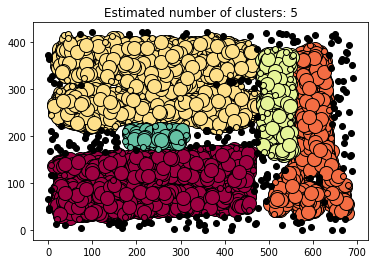

In [6]:
X= np.genfromtxt('./t8.8k.dat', dtype=None, delimiter=' ')

#Compute DBSCAN
#eps et min_samples=bore inférieur pour la taille des classes
db=DBSCAN(eps=12,min_samples=6).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


# silhouette coefficient and david bouldin
sc88= metrics.silhouette_score(X, labels)
print("Silhouette Coefficient: %0.3f"
      % sc88)

print ("David Bouldin Coefficient: %0.3f"
      %davies_bouldin_score(X, labels))

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


### 1.2 Analyses des résultats obtenus par la recherche intuitive

Ci-dessous l'affichage des coefficients de silhouette et de David Bouldin trouvés pour chaque dataset.

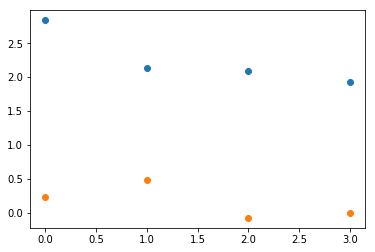

In [34]:
plt.plot([2.840,2.140,2.094,1.932],'o')
plt.plot([0.234,0.478,-0.079,-0.007],'o')
plt.show()

On observe que les coefficients de silhouette avoisinent 0, ce qui devrait correspondre à des clusters qui se chevauchent. Cela peut s'expliquer par le fait qu'on ait des formes non-convexes, le coefficient de silhouette étant normalement adapté pour des formes convexes.
Mais concernant le coefficient de Davies Bouldin on observe que les valeurs sont comprisent entre [2.8, 1.9] et n'avoisinent pas 0 comme le prévoit la méthode.

## 2. Automatisation de la recherche des paramètres 



In [3]:
data = ['t4.8k.dat','t5.8k.dat','t7.10k.dat','t4.8k.dat']
min_samplesList = [17,15,13,8]
XList = []
for i in range(0, len(data)):
    XList.append(np.genfromtxt('./'+data[i],dtype=None,delimiter=' '))

Chercher un eps pour obtenir un bon index de Davies-Bouldin (proche de 0)

In [4]:
bestEpsList = []
bestDaviesList = []
for i in range(0,len(data)):
    X = XList[i]
    db = DBSCAN(eps=5,min_samples=min_samplesList[i]).fit(X)
    labels = db.labels_
    bestEps=5
    bestDavies = davies_bouldin_score(X, labels)
    for j in np.arange(5.1,20,0.1):
        db = DBSCAN(eps=j,min_samples=min_samplesList[i]).fit(X)
        labels = db.labels_
        davies = davies_bouldin_score(X, labels)
        if davies < bestDavies :
            bestDavies = davies
            bestEps = j
    bestEpsList.append(bestEps)
    bestDaviesList.append(bestDavies)
print(bestEpsList)
print(bestDaviesList)
    

[5.399999999999999, 9.499999999999984, 5.899999999999997, 8.799999999999986]
[1.1885023824332348, 1.5766250899947587, 1.3506019674924497, 1.6293105438322835]


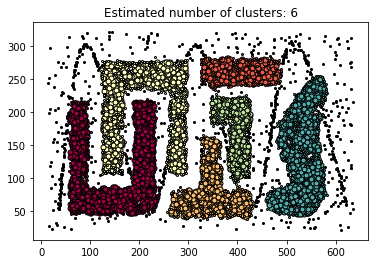

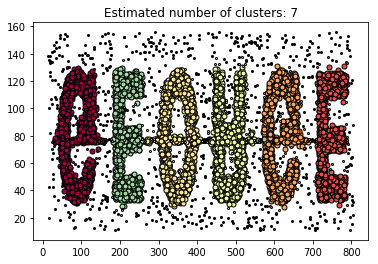

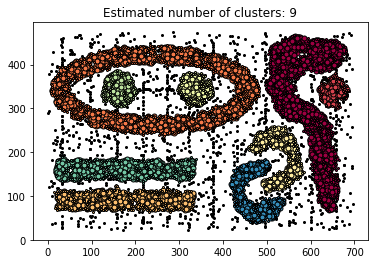

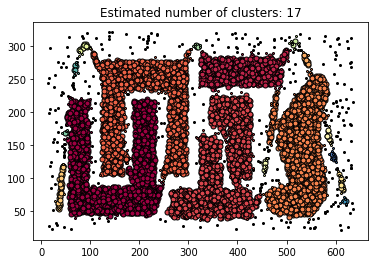

In [5]:
for i in range(0, len(data)):
    X = XList[i]
    db = DBSCAN(eps=bestEps,min_samples=min_samplesList[i]).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    # Plot result
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=5)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=2)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show() 


On observe que l'on obtient de très bon résultats avec notre algorithme de minimisation de l'index de Davies Bouldin.

Chercher un eps pour obtenir une bonne silhouette (proche de 1)

In [6]:
bestEpsList2 = []
bestSilhouetteList = []
for i in range(0,len(data)):
    X = XList[i]
    db = DBSCAN(eps=5,min_samples=min_samplesList[i]).fit(X)
    labels = db.labels_
    bestEps=5
    bestSilhouette = metrics.silhouette_score(X, labels)
    for j in np.arange(5.1,20,0.1):
        db = DBSCAN(eps=j,min_samples=min_samplesList[i]).fit(X)
        labels = db.labels_
        silhouette = metrics.silhouette_score(X, labels)
        if silhouette > bestSilhouette :
            bestSilhouette = silhouette
            bestEps = j
    bestEpsList2.append(bestEps)
    bestSilhouetteList.append(bestSilhouette)
print(bestEpsList2)
print(bestSilhouetteList)

[13.899999999999968, 9.799999999999983, 13.19999999999997, 19.799999999999947]
[0.3035990362287663, 0.4250663573426389, 0.30919573394216104, 0.17363798241264677]


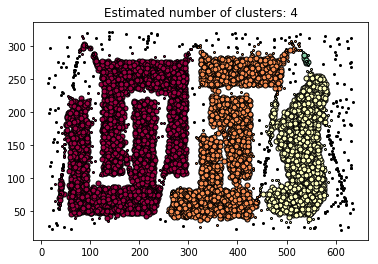

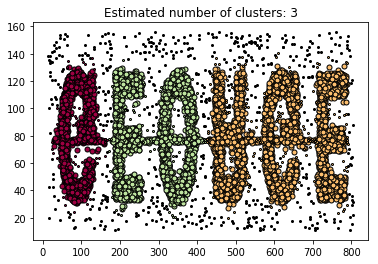

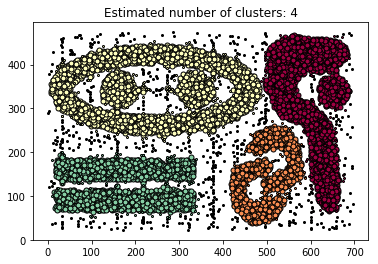

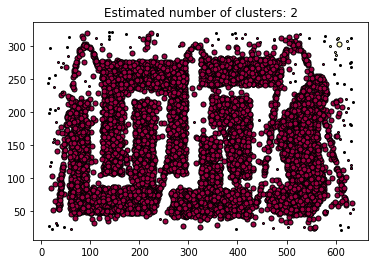

In [7]:
for i in range(0, len(data)):
    X = XList[i]
    db = DBSCAN(eps=bestEpsList2[i],min_samples=min_samplesList[i]).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    # Plot result
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=5)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=2)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show() 

On observe que l'on obtient des cluster de formes convexes très distincts dans l'espace les uns des autres. Le coefficient de silhouette est bien optimal pour les formes convexes, moins si cela n'est pas le cas (voir dernière figure).


### Conclusion sur DBSCAN

L'avantage de DBSCAN est qu'il ne requière pas de prédefinir le nombre de cluster, c'est lui qui va en déterminer le nombre en fonction des paramètres.

DBSCAN présente cependant des limites quant à son utilisation. Notament dans le choix des paramètres eps et min_samples, difficils à déterminer. 
De plus DBSCAN permet de trouver des clusters de tailles et de formes différentes, mais pas de différentes densités.
En terme de scalabilité le passage à de plus grandes dimenssions est difficile avec cet algorithme.

## <font color='blue'>Deuxième partie : SNN</font>

Dans cette seconde partie nous allons appliquer l'algorithme SNN (Shared Nearest Neighbor) basé sur un graphe des k plus proches voisins.
Cette méthode définit la similarité entre deux points en terme des plus proches voisins partagés. La simlarité est confirmée s'ils possèdent les mêmes plus proches voisins.

### 1. Implémentation de l'algorithme

#### 1.1 Algorithme 1

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection as ms
import matplotlib.pyplot as plt
from random import randint
import time
import sklearn.neighbors as nn
import scipy.spatial.distance as dist
import scipy.sparse

# importation du dataset
X= np.genfromtxt('./t4.8k.dat', dtype=None, delimiter=' ')
# choix du nombre de voisins pour K-NN
k=5

# mise en forme du dataset
lat=[]
lon=[]
for i in range(0,10):
    latitude=(X[i][0])
    longitude=(X[i][1])
    lat.append(latitude)
    lon.append(longitude)

# definition de la distance euclidienne
def dist_euclidienne(lat1,lon1,lat2, lon2):
    return (abs(float(lat2)-float(lat1))**2+abs(float(lon2)-float(lon1))**2)**0.5

# calcul de la matrice de distance
distanceMatrice=[[0 for i in range(len(lat))] for j in range(len(lat))]
for i in range(len(lat)):
    for j in range(len(lon)):
        distanceMatrice[i][j]=((i,j),dist_euclidienne(lat[i],lon[i],lat[j],lon[j]))

#print("Matrice de distance")
#print(distanceMatrice)

# calcul des K-NN points
# la matrice intermediaire permet de classer les k voisins du plus proche au plus lointain 
#(à partir de la matrice de distance) pour chaque point
# la matrice de similarité correspond au k voisins les plus proches du point
count=len(distanceMatrice)
similarityMatrice = [[0 for i in range(k)] for j in range(count)]
for i in range(count):
    matriceIntermediaire = sorted(distanceMatrice[i], key=lambda x: x[1])
    #print(matriceIntermediaire)
    for j in range(k):
        similarityMatrice[i][j] = int(matriceIntermediaire[j+1][0][1])

print("Liste des k plus proches voisins pour chaque points")
print(similarityMatrice)   


# On choisira l'hypothèse où les poids des liens entre deux points du graphique snn sont le nombre de 
#voisins proches communs aux deux points
def countIntersection(listi,listj):
    intersection=0
    for i in listi:
        if i in listj:
            #on compte le nombre de voisins communs
            intersection=intersection+1
    return intersection


# construire le graphe de voisinage (graphe SNN)
# La simlarité est confirmé s'ils possèdent les mêmes plus proches voisins
# et qu'ils sont eux meme plus proches voisins
count=len(similarityMatrice)
Snngraph= [[0 for i in range(count)] for j in range(count)]
for i in range(0,count-1):
    nextIndex=i+1
    for j in range(nextIndex,count):
        # on verifie que les deux points sont respectivemens dans les k plus proches voisins
        if j in similarityMatrice[i] and i in similarityMatrice[j]:
            count1=countIntersection(similarityMatrice[i],similarityMatrice[j])
            Snngraph[i][j]=count1
            Snngraph[j][i]=count1

print("graphe SNN")
print(Snngraph)

Liste des k plus proches voisins pour chaque points
[[6, 2, 7, 5, 9], [3, 9, 8, 4, 5], [5, 0, 6, 7, 9], [1, 9, 8, 4, 5], [8, 9, 7, 6, 3], [2, 0, 6, 7, 9], [7, 0, 2, 5, 4], [6, 0, 2, 5, 4], [4, 9, 3, 1, 7], [3, 8, 4, 2, 5]]
graphe SNN
[[0, 0, 4, 0, 0, 4, 3, 3, 0, 0], [0, 0, 0, 4, 0, 0, 0, 0, 3, 0], [4, 0, 0, 0, 0, 4, 3, 3, 0, 1], [0, 4, 0, 0, 2, 0, 0, 0, 3, 3], [0, 0, 0, 2, 0, 0, 1, 1, 3, 2], [4, 0, 4, 0, 0, 0, 3, 3, 0, 1], [3, 0, 3, 0, 1, 3, 0, 4, 0, 0], [3, 0, 3, 0, 1, 3, 4, 0, 0, 0], [0, 3, 0, 3, 3, 0, 0, 0, 0, 2], [0, 0, 1, 3, 2, 1, 0, 0, 2, 0]]


Nous avons trouvé par la suite des méthodes permettant de calculer les matrices intermediaires. Le temps de calcul étant vraiment plus faible nous avons choisis d'utiliser ces méthodes pour la suite du TP. Ci-dessous le deuxième algorithme prennnant en compte le poids des arcs (cf article).

#### 1.2 Algorithme 2

Nous avons implémenté dans la première partie une version "simple" de SNN telle que présentée dans le cours d'apprentissage non-supervisé. C'est à dire que pour chaque élément de la matrice SNN, on met le nombre de plus proche voisins communs entre deux points (ligne et colonne). 

Dans cette partie, nous implémentons la version pondérée de l'algorithme telle que présentée dans l'article.
Soit, pour chaque élément de la matrice SNN, on calcule la "force totale du lien" de la forme Σ(k+1-m)x(k+1-n).  
k correspond au nombre de voisins.  
On a considéré que m et correspondait aux valeurs de similarité dans la matrice knn.  
Lorsque cette force est en dessous d'un certain seuil, on met à 0 l'élément.

In [8]:
import scipy.spatial.distance as dist

data = ['t4.8k.dat','t5.8k.dat','t7.10k.dat','t4.8k.dat']
XList = []
for i in range(0, len(data)):
    XList.append(np.genfromtxt('./'+data[i],dtype=None,delimiter=' '))

"""
get SNN matrix;
parameters:
    entry_X : data matrix, 
    sample_size : number of rows to keep in the data matrix,
    neighbors : number of neighbors for knn search
    treshold : all  edges  with  weights  less  than  the  specified  threshold  are  removed 
"""
def getSNNMatrix(entry_X,sample_size,neighbors,treshold):
    
    #get sample of entry_X
    X = []
    for i in range(0,sample_size):
        X.append(entry_X[i])
    
    #get distance matrix
    distance_matrix = dist.squareform(dist.pdist(X, 'euclidean'))
    
    #get similarity matrix
    similarity_matrix = (1/(1+distance_matrix))
    
    #get knn matrix
    connectivity_matrix = nn.kneighbors_graph(similarity_matrix,neighbors,mode='connectivity',include_self=False).todense()
    knn_matrix = np.multiply(connectivity_matrix,similarity_matrix)
    
    #get knn as list (list of lists of k nearest neighbors)
    knn_list = []
    for i in range(0,sample_size):
        knn_list.append([])
        for j in range(0,sample_size):
            if (connectivity_matrix.item(i*sample_size+j) != 0) & (connectivity_matrix.item(j*sample_size+i) != 0):
                knn_list[i].append(j)
    
    #build snn matrix, and fill it with link strengths
    snn_matrix = []
    for i in range(0,sample_size):
        snn_matrix.append([])
        for j in range(0,sample_size):            
            #if it's the same element, put 0 
            if i == j:
                snn_matrix[i].append(0)               
            else:
                #get elements' shared nearest neighbors : intersection of elements' k nearest neighbors
                common = list(set(knn_list[i]).intersection(knn_list[j]))                
                #if elements have a direct link, initialize sum with this link strength
                if (knn_matrix.item(i*sample_size+j) != 0):
                    sum = (neighbors+1-knn_matrix.item(i*sample_size+j))*(neighbors+1-knn_matrix.item(j*sample_size+i))
                else:
                    #initialize sum to 0
                    sum = 0                
                #add each shared element link strength to sum 
                for l in common:
                    sum += (neighbors+1-knn_matrix.item(i*sample_size+l))*(neighbors+1-knn_matrix.item(j*sample_size+l))
                #if sum (total link strength) is under the treshold, put 0
                if sum < treshold:
                    snn_matrix[i].append(0)
                else:
                    #add sum to our snn matrix
                    snn_matrix[i].append(sum)
                    
    #uncomment the following lines to print intermediate matrices
    """
    print("distance matrix:\n",distance_matrix,"\n")
    print("similarity matrix:\n",similarity_matrix,"\n")
    print("connectivity matrix:\n",connectivity_matrix,"\n")
    print("knn matrix:\n",knn_matrix,"\n")
    """
    print("Liste des k plus proches voisins pour chaque point:\n",knn_list,"\n")
    return(snn_matrix)

    
#let's take the same example as before with a treshold of 100
snn = getSNNMatrix(XList[0],10,5,100) 
print("Graphe SNN avec un seuil de 100:\n",snn)


Liste des k plus proches voisins pour chaque point:
 [[2, 5, 6, 7], [3, 8], [0, 5, 6, 7, 9], [1, 4, 8, 9], [3, 7, 8, 9], [0, 2, 6, 7, 9], [0, 2, 5, 7], [0, 2, 4, 5, 6], [1, 3, 4, 9], [2, 3, 4, 5, 8]] 

Graphe SNN avec un seuil de 100:
 [[0, 0, 143.3522055299831, 0, 0, 143.40033024175426, 143.04358780406562, 143.06459977083497, 0, 107.77090551333677], [0, 0, 0, 0, 107.75594937679409, 0, 0, 0, 0, 107.77719933520501], [143.3522055299831, 0, 0, 0, 0, 179.3009971726922, 143.0113322852769, 143.03223242128803, 0, 0], [0, 0, 0, 0, 107.73017213042334, 0, 0, 0, 143.62244061916533, 107.75932807979086], [0, 0, 0, 107.73017213042334, 0, 0, 0, 0, 107.66330072465543, 107.69987681936078], [143.40033024175426, 0, 179.3009971726922, 0, 0, 0, 143.059314973831, 143.08020312200762, 0, 0], [143.04358780406562, 0, 143.0113322852769, 0, 0, 143.059314973831, 0, 142.72804024753253, 0, 0], [143.06459977083497, 0, 143.03223242128803, 0, 0, 143.08020312200762, 142.72804024753253, 0, 0, 107.77056237399702], [0, 0, 

### Conclusion sur SNN

Nous n'avons pas pu aller jusqu'à comparer réellement les deux méthodes, n'ayant pu aller jusqu'à l'identification des clusters pour la méthode SNN.

Cependant nous avons retenu de la méthode SNN qu'elle possède de meilleures performances pour le passage à l'échelle. Elle est donc plus performante pour des datasets à grandes dimensions.   De plus SNN peut détecter des grappes de densités différentes alors que DBSCAN ne le peut pas.  Mais elle est difficile à comprendre et à mettre en place. 